In [10]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from ignite.engine import Engine, Events
from ignite.metrics import Loss
# from ignite.contrib.metrics.classification import Loss

# 定义训练步骤
def train_step(engine, batch):
    model.train()
    optimizer.zero_grad()
    x, y = batch
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    return loss.item()

# 定义评估步骤
def evaluate_step(engine, batch):
    model.eval()
    with torch.no_grad():
        x, y = batch
        y_pred = model(x)
        return y_pred, y

# 创建数据加载器
train_dataset = MNIST(download=True, root="data", train=True, transform=ToTensor())
val_dataset = MNIST(download=False, root="data", train=False, transform=ToTensor())
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)

# 创建模型、优化器和损失函数
model = nn.Sequential(nn.Flatten(), nn.Linear(784, 10), nn.Softmax(dim=1))
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

# 创建训练和评估引擎
trainer = Engine(train_step)
evaluator = Engine(evaluate_step)

# 添加损失指标
Loss(criterion).attach(trainer, "loss")

# 定义事件处理器
@trainer.on(Events.EPOCH_COMPLETED)
def log_training_results(engine):
    avg_loss = engine.state.metrics['loss']
    print("Training Results - Epoch: {}  Avg Loss: {:.4f}".format(engine.state.epoch, avg_loss))

@evaluator.on(Events.EPOCH_COMPLETED)
def log_evaluation_results(engine):
    y_pred, y = engine.state.output
    loss = criterion(y_pred, y).item()
    accuracy = (y_pred.argmax(1) == y).float().mean()#.item()
    print("Evaluation Results - Epoch: {}  Loss: {:.4f}  Accuracy: {:.4f}".format(engine.state.epoch, loss, accuracy))

# 运行训练和评估循环
trainer.run(train_loader, max_epochs=5)
# evaluator.run(val_loader)

Current run is terminating due to exception: object of type 'float' has no len()
Engine run is terminating due to exception: object of type 'float' has no len()


TypeError: object of type 'float' has no len()

In [16]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from ignite.engine import Engine, Events
from ignite.metrics import Loss, Accuracy

# Define training step
def train_step(engine, batch):
    model.train()
    optimizer.zero_grad()
    x, y = batch
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    return loss.item()

# Define evaluation step
def evaluate_step(engine, batch):
    model.eval()
    with torch.no_grad():
        x, y = batch
        y_pred = model(x)
        return y_pred, y

# Create data loaders
train_dataset = MNIST(download=True, root="data", train=True, transform=ToTensor())
val_dataset = MNIST(download=False, root="data", train=False, transform=ToTensor())
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)

# Create model, optimizer, and loss function
model = nn.Sequential(nn.Flatten(), nn.Linear(784, 10), nn.Softmax(dim=1))
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

# Create training and evaluation engines
trainer = Engine(train_step)
evaluator = Engine(evaluate_step)

# Add loss metric and accuracy metric to evaluator engine
loss_metric = Loss(criterion)
loss_metric.attach(evaluator, "loss")
accuracy_metric = Accuracy()
accuracy_metric.attach(evaluator, "accuracy")

# Define event handlers
@trainer.on(Events.EPOCH_COMPLETED)
def log_training_results(engine):
    print("Training Results - Epoch: {}  Avg Loss: {:.4f}".format(engine.state.epoch, engine.state.output))

@evaluator.on(Events.EPOCH_COMPLETED)
def log_evaluation_results(engine):
    metrics = engine.state.metrics
    avg_loss = metrics['loss']
    accuracy = metrics['accuracy']
    print("Evaluation Results - Epoch: {}  Loss: {:.4f}  Accuracy: {:.4f}".format(engine.state.epoch, avg_loss, accuracy))

# Run training and evaluation loops
trainer.run(train_loader, max_epochs=5)
evaluator.run(val_loader)

Training Results - Epoch: 1  Avg Loss: 1.9873
Training Results - Epoch: 2  Avg Loss: 1.9804
Training Results - Epoch: 3  Avg Loss: 1.7968
Training Results - Epoch: 4  Avg Loss: 1.7798
Training Results - Epoch: 5  Avg Loss: 1.7775
Evaluation Results - Epoch: 1  Loss: 1.7453  Accuracy: 0.8055


State:
	iteration: 157
	epoch: 1
	epoch_length: 157
	max_epochs: 1
	output: <class 'tuple'>
	batch: <class 'list'>
	metrics: <class 'dict'>
	dataloader: <class 'torch.utils.data.dataloader.DataLoader'>
	seed: <class 'NoneType'>
	times: <class 'dict'>

In [14]:
trainer.run(train_loader, max_epochs=5)

Training Results - Epoch: 1  Avg Loss: 1.7536
Training Results - Epoch: 2  Avg Loss: 1.6158
Training Results - Epoch: 3  Avg Loss: 1.7220
Training Results - Epoch: 4  Avg Loss: 1.6594
Training Results - Epoch: 5  Avg Loss: 1.7000


State:
	iteration: 4690
	epoch: 5
	epoch_length: 938
	max_epochs: 5
	output: 1.6999510526657104
	batch: <class 'list'>
	metrics: <class 'dict'>
	dataloader: <class 'torch.utils.data.dataloader.DataLoader'>
	seed: <class 'NoneType'>
	times: <class 'dict'>

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


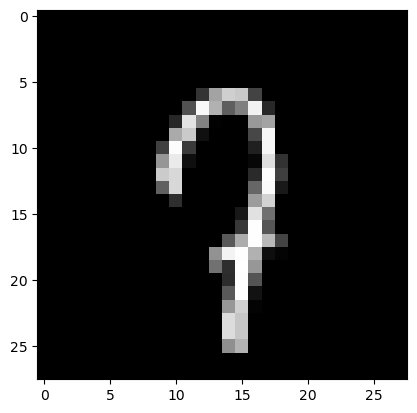

Label: 7


In [18]:
# Display image and label.
import matplotlib.pyplot as plt

train_features, train_labels = next(iter(train_loader)) #get data for one batch 
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

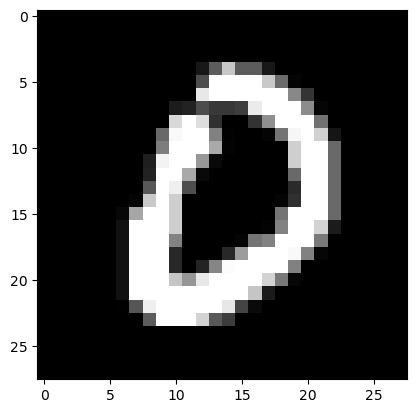

Label: 0


In [19]:
img = train_features[1].squeeze()
label = train_labels[1]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [24]:
train_features[0].shape

torch.Size([1, 28, 28])

In [25]:
train_features.shape #batch size 64 

torch.Size([64, 1, 28, 28])

In [29]:
for data in train_loader:
    feature1,label1=data
    break
#each iteration is a full batch 

In [31]:
feature1.shape

torch.Size([64, 1, 28, 28])

In [33]:
label1.shape

torch.Size([64])

In [35]:
for data in train_dataset:
    img1, l1=data
    print(data) # each iteration is one data 
    break

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [36]:
img1.shape #one image 

torch.Size([1, 28, 28])

In [ ]:
#need to change anndataset to pass atac seq data